# Reservoir storage and elevation data download from Califonia Data Exchange Center (CDEC)

This code will help you download reservoir storage and elevation data from the Califonia Data Exchange Center (CDEC) from 1980 to 2023. 

The CDEC reservoir list can be downloaded from this link: https://cdec.water.ca.gov/reportapp/javareports?name=ResInfo 

Stations: The station ID was extracted from the link above and the query search portal (https://cdec.water.ca.gov/dynamicapp/wsSensorData) was used to extract reservoir specific information. 

SensorNums: Sensor number are 2, 4, 6, 14, 15, 22, 30, 31, 32, 45, and 65. For details on the sensor information (see figure).

dur_code: Hourly, Event and Daily has H, E, and D codes separately (see figure).

Start: Start date of your required time period

End: End date of your required time period

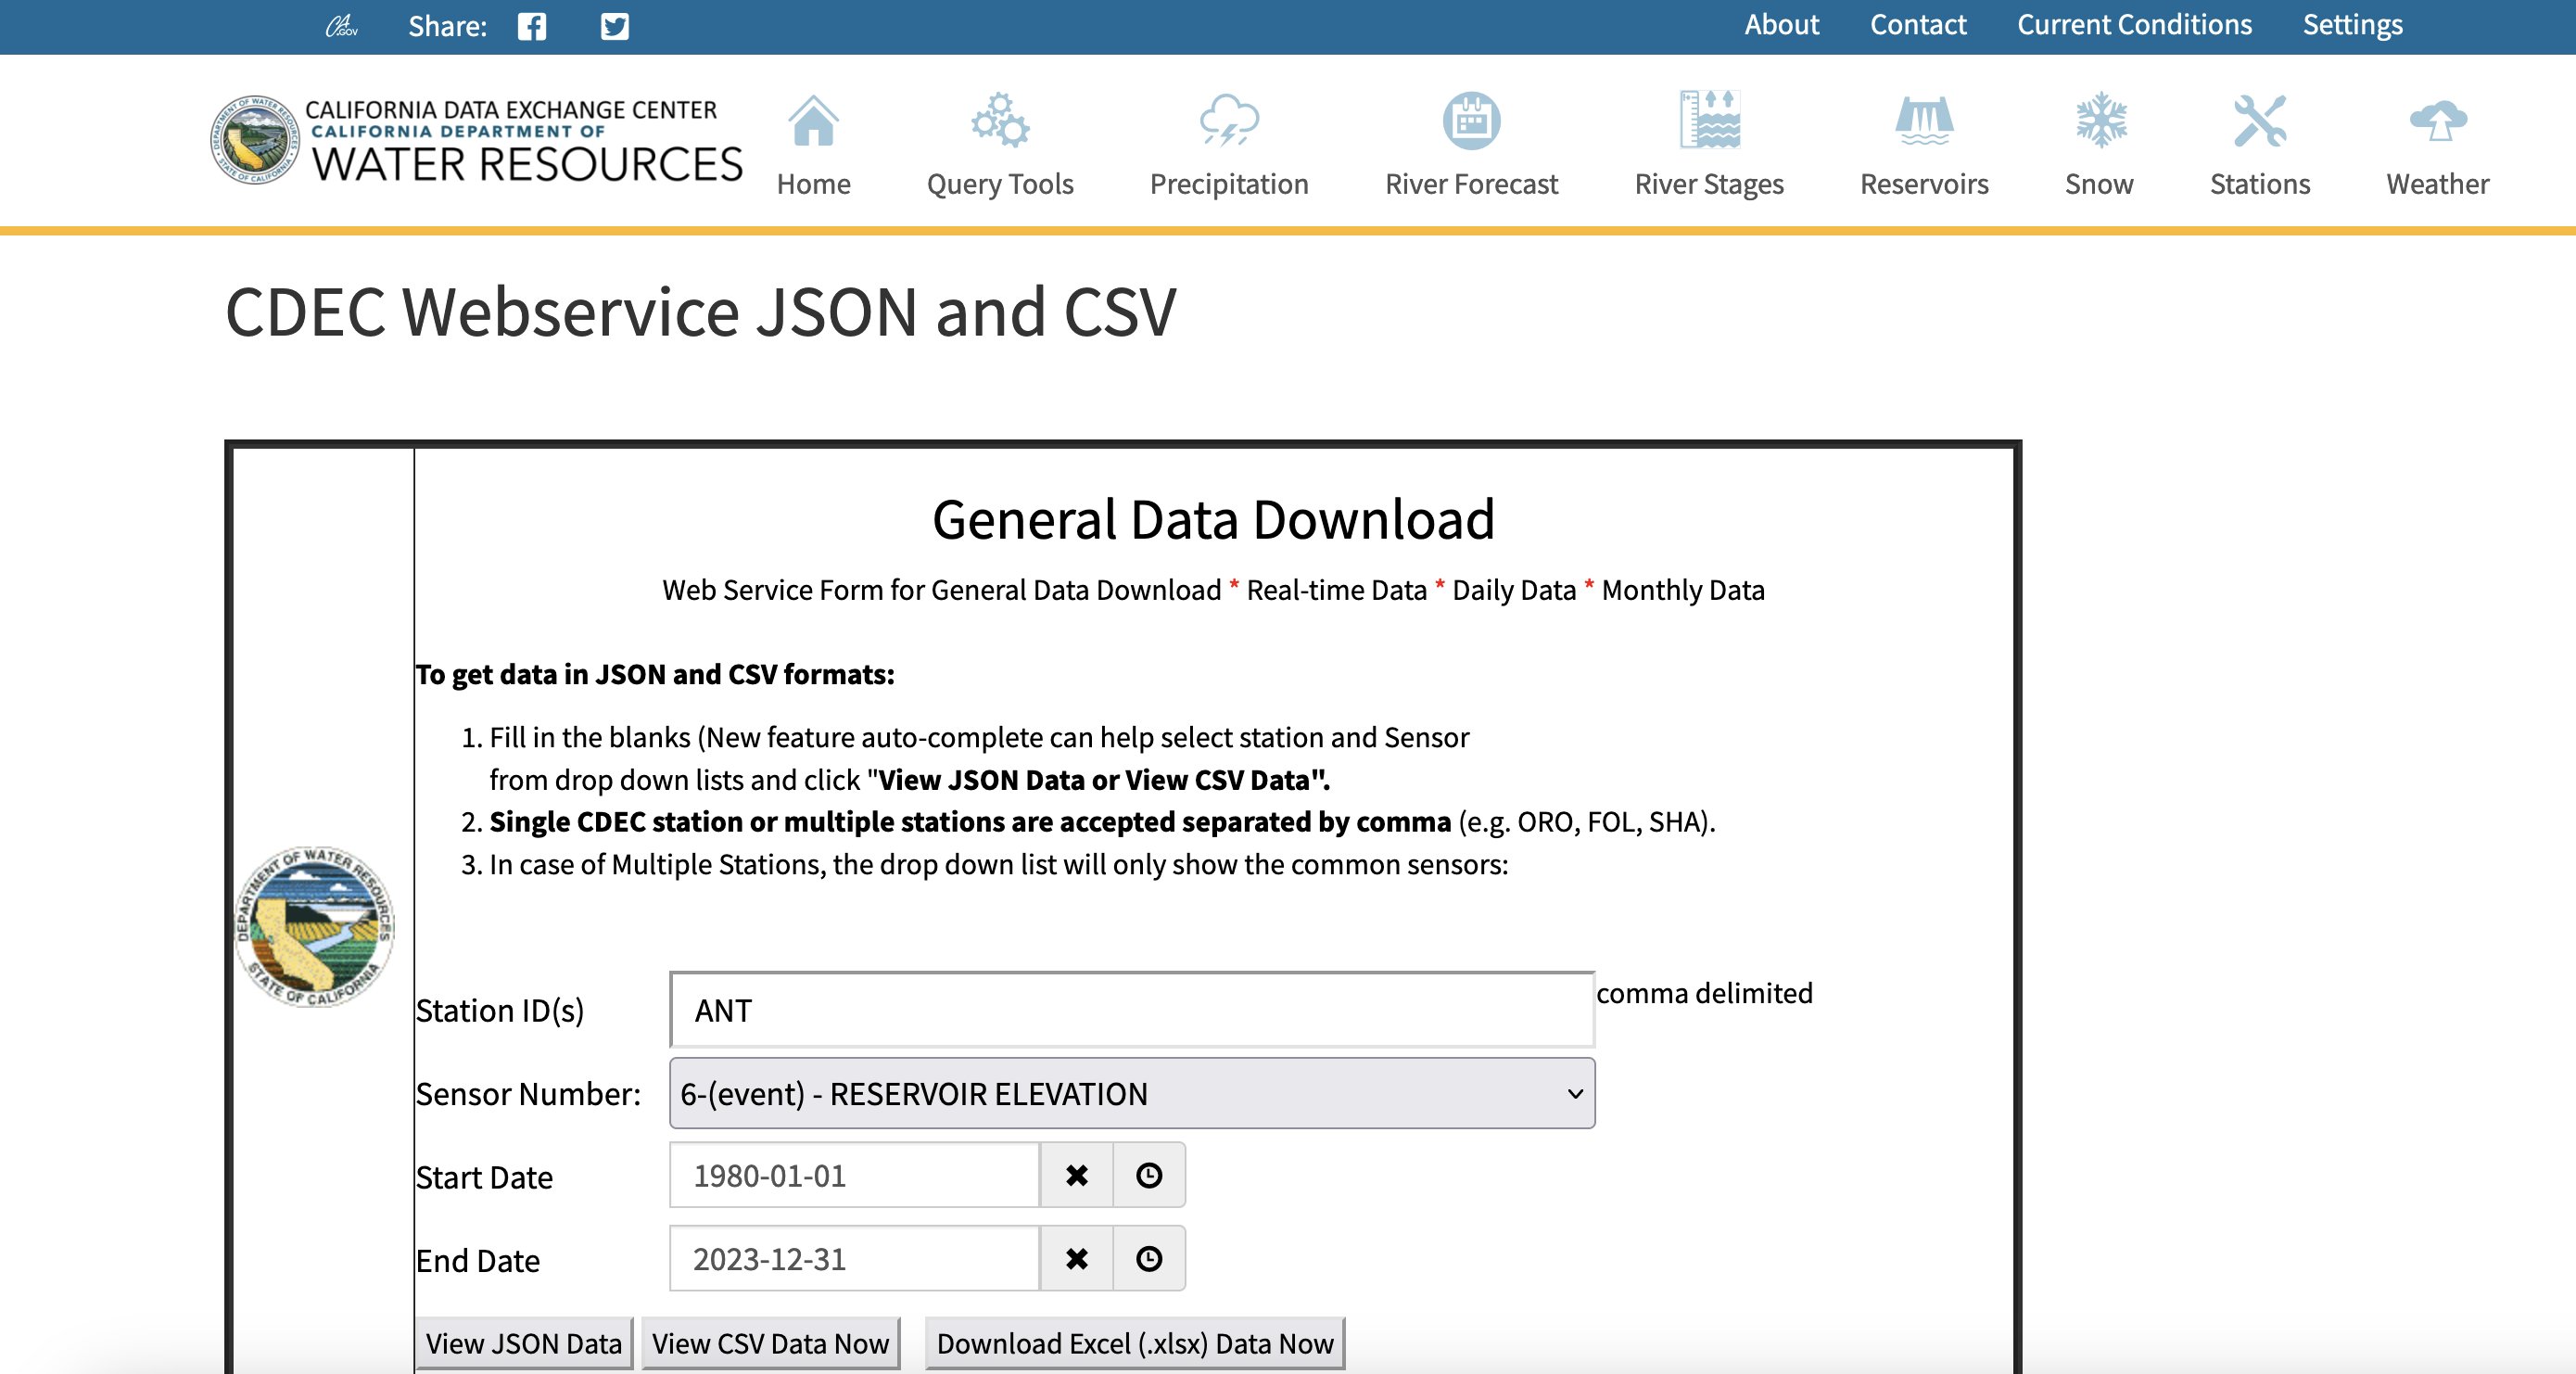

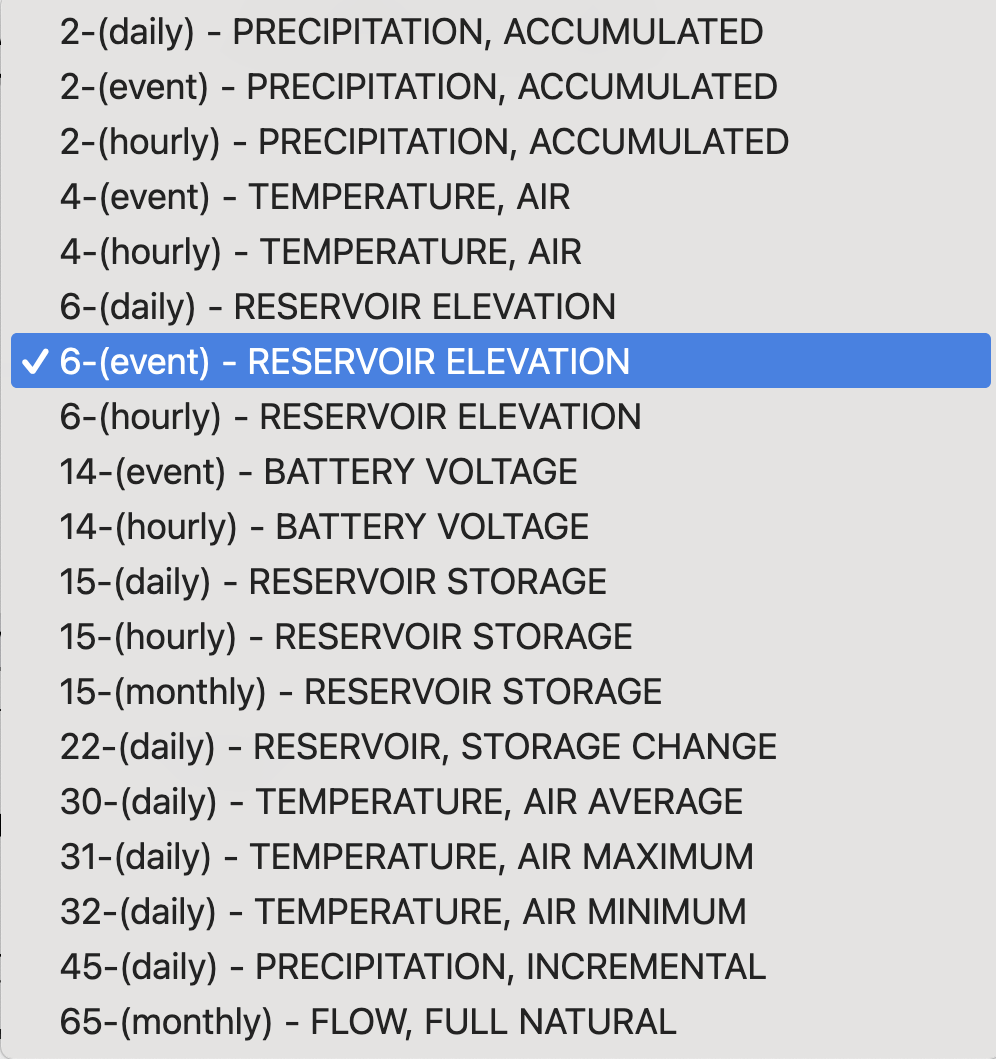

In [55]:
import os
import requests
import pandas as pd
from io import StringIO

# To download daily reservoir elevation (Sensor 6 and duration D) for all the reservoirs from CDEC.
# If you want to download for different variables and duration, change it in the sensornums and dur_code

def download_cdec_data(station_id, sensor_numbers, start_date, end_date, output_dir):
    base_url = 'https://cdec.water.ca.gov/dynamicapp/req/CSVDataServlet'
    
    all_data = pd.DataFrame()
    
    for sensor_number in sensor_numbers:
        params = {
            'Stations': station_id,
            'SensorNums': sensor_number,
            'dur_code': 'D',  # Daily data; change to 'H' for hourly or 'M' for monthly if needed
            'Start': start_date,
            'End': end_date
        }
        
        response = requests.get(base_url, params=params)
        
        if response.status_code == 200 and response.text.strip():
            # Load CSV data into a DataFrame
            sensor_data = pd.read_csv(StringIO(response.text))
            sensor_data['Sensor'] = sensor_number  # Add a column to distinguish sensor data
            all_data = pd.concat([all_data, sensor_data])
        else:
            print(f"No data available or failed to retrieve data for station {station_id} and sensor {sensor_number}")
    
    if not all_data.empty:
        # Save concatenated data to a CSV file in the output directory
        csv_file_path = os.path.join(output_dir, f'{station_id}_ele.csv')
        all_data.to_csv(csv_file_path, index=False)
        print(f"CSV data for station {station_id} saved to {csv_file_path}")
    else:
        print(f"No data available or failed to retrieve data for station {station_id}")

# Read the CSV file containing station IDs and other parameters
csv_file_path = '/Users/surabhiupadhyay/Documents/_Research/Data/CDEC/CDEC_reservoir_list.csv'
csv_data = pd.read_csv(csv_file_path)

# Parameters for data retrieval
sensor_numbers = ['6']  # Example sensor numbers, adjust as needed
default_start_date = '1980-01-01'  # Default start date if not provided
end_date = '2023-12-31'  # Example end date, adjust as needed

# Define the output directory
output_dir = '/Users/surabhiupadhyay/Documents/_Research/Data/CDEC/ele'
os.makedirs(output_dir, exist_ok=True)

# Loop through each row in the CSV file to fetch and save data
for index, row in csv_data.iterrows():
    station_id = row['ID']
    start_date = row.get('StartDate', default_start_date)  # Use start date from CSV if available, else default

    # Download data for each station
    download_cdec_data(station_id, sensor_numbers, start_date, end_date, output_dir)

CSV data for station APN saved to /Users/surabhiupadhyay/Documents/_Research/Data/CDEC/ele/APN_ele.csv
CSV data for station ANT saved to /Users/surabhiupadhyay/Documents/_Research/Data/CDEC/ele/ANT_ele.csv
No data available or failed to retrieve data for station AST
CSV data for station BRT saved to /Users/surabhiupadhyay/Documents/_Research/Data/CDEC/ele/BRT_ele.csv
CSV data for station BAR saved to /Users/surabhiupadhyay/Documents/_Research/Data/CDEC/ele/BAR_ele.csv
No data available or failed to retrieve data for station BRV
CSV data for station BRD saved to /Users/surabhiupadhyay/Documents/_Research/Data/CDEC/ele/BRD_ele.csv
No data available or failed to retrieve data for station BTH
CSV data for station BLB saved to /Users/surabhiupadhyay/Documents/_Research/Data/CDEC/ele/BLB_ele.csv
CSV data for station BOC saved to /Users/surabhiupadhyay/Documents/_Research/Data/CDEC/ele/BOC_ele.csv
CSV data for station BMP saved to /Users/surabhiupadhyay/Documents/_Research/Data/CDEC/ele/BMP_e